In [20]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

In [21]:
shoppers_data = pd.read_csv('./online_shoppers_intention.csv')
shoppers_data.sample(10)
shopping = pd.read_csv('./online_shoppers_intention.csv')

In [22]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline
import warnings   # To ignore any warnings
warnings.filterwarnings("ignore")

In [23]:
df = pd.read_csv('./online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.00,0.20,0.20,0.0,0.0,Feb,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.00,0.00,0.10,0.0,0.0,Feb,2,2,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.00,0.20,0.20,0.0,0.0,Feb,4,1,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.67,0.05,0.14,0.0,0.0,Feb,3,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.50,0.02,0.05,0.0,0.0,Feb,3,3,4,Returning_Visitor,True,False


In [24]:
df.shape

(12546, 17)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12546 entries, 0 to 12545
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12546 non-null  int64  
 1   Administrative_Duration  12546 non-null  float64
 2   Informational            12546 non-null  int64  
 3   Informational_Duration   12546 non-null  float64
 4   ProductRelated           12546 non-null  int64  
 5   ProductRelated_Duration  12546 non-null  float64
 6   BounceRates              12546 non-null  float64
 7   ExitRates                12546 non-null  float64
 8   PageValues               12546 non-null  float64
 9   SpecialDay               12546 non-null  float64
 10  Month                    12546 non-null  object 
 11  OperatingSystems         12546 non-null  int64  
 12  Browser                  12546 non-null  int64  
 13  TrafficType              12546 non-null  int64  
 14  VisitorType           

In [26]:
# let get each columns unique value and there values of int64 and bool
for col in df.columns:
    print("{} have {} unique values: {}".format(col, df[col].nunique(), df[col].dtypes))
    if df[col].dtypes == 'int64' or df[col].dtypes == 'bool':
        print("{} values: {}".format(col,df[col].unique()))
        

Administrative have 27 unique values: int64
Administrative values: [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
Administrative_Duration have 3335 unique values: float64
Informational have 17 unique values: int64
Informational values: [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
Informational_Duration have 1258 unique values: float64
ProductRelated have 311 unique values: int64
ProductRelated values: [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112
 131 159  94 204 142 206 102 313 145  8

In [27]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [28]:
df['Revenue'].value_counts(normalize=True)

False    0.847202
True     0.152798
Name: Revenue, dtype: float64

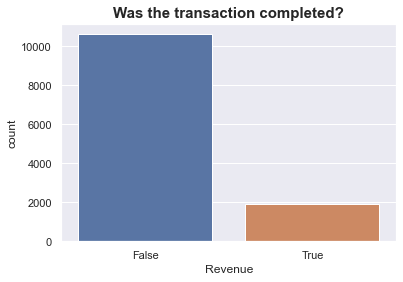

In [29]:
sns.set_theme(style="darkgrid")
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Revenue')
plt.title('Was the transaction completed?', fontsize=15, fontweight='bold')
plt.show()

In [30]:
# Here we change Opearting system value from numerical to caterogical
# Data is take from Google.
df.loc[df['OperatingSystems'] == 1,'OperatingSystems'] = 'IOS'
df.loc[df['OperatingSystems'] == 2,'OperatingSystems'] = 'Android Mobile'
df.loc[df['OperatingSystems'] == 3,'OperatingSystems'] = 'Windows'
df.loc[df['OperatingSystems'] == 4,'OperatingSystems'] = 'Linux'


In [31]:
# Here we change Browser value from numerical to caterogical
# Data is take from Google. Top 10 list of browser.
df.loc[df['Browser'] == 1,'Browser'] = 'Firefox'
df.loc[df['Browser'] == 2,'Browser'] = 'Google Chrome'
df.loc[df['Browser'] == 3,'Browser'] = 'Opera'
df.loc[df['Browser'] == 4,'Browser'] = 'Apple Safari'
df.loc[df['Browser'] == 5,'Browser'] = 'Microsoft Edge'


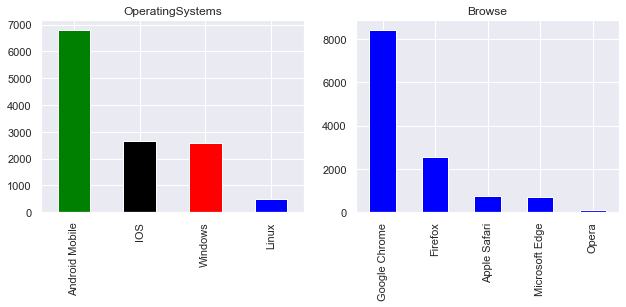

In [32]:
# Independed variable [caterogical]
plt.figure(1)
plt.subplot(331) 
df['OperatingSystems'].value_counts().plot.bar(figsize=(16,12), title= 'OperatingSystems', color=['green', 'black', 'red', 'blue', 'cyan'])

plt.subplot(332) 
df['Browser'].value_counts().plot.bar(title= 'Browse', color='blue')



plt.show()

<AxesSubplot:title={'center':'TrafficType'}>

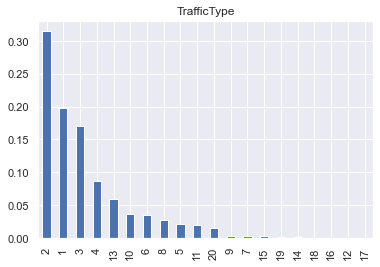

In [33]:
df['TrafficType'].value_counts(normalize=True).plot.bar(title= 'TrafficType')

<AxesSubplot:title={'center':'Weekend'}>

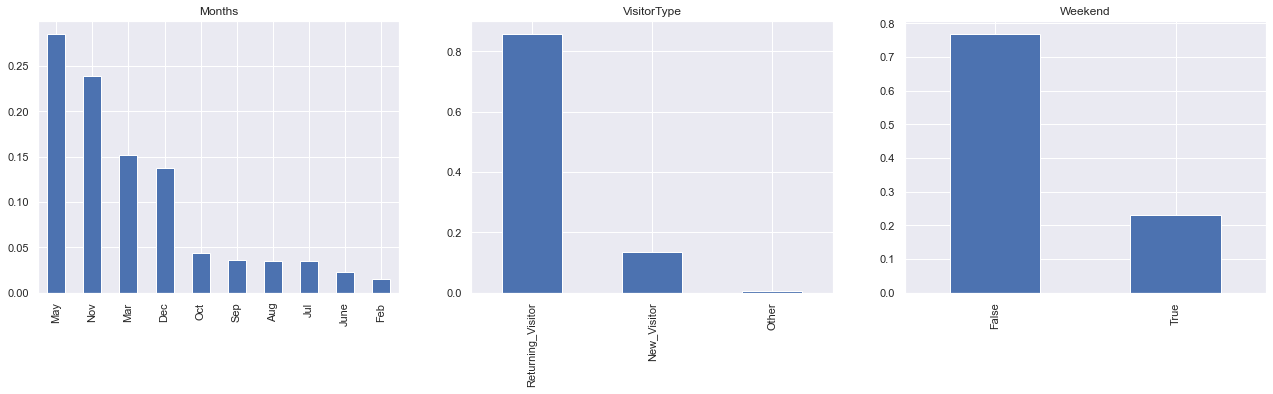

In [34]:
# Independed variable [ordinal]
plt.figure(1) 
plt.subplot(131) 
df['Month'].value_counts(normalize=True).plot.bar(figsize=(22,5), title= 'Months')

plt.subplot(132) 
df['VisitorType'].value_counts(normalize=True).plot.bar(figsize=(22,5), title= 'VisitorType')

plt.subplot(133) 
df['Weekend'].value_counts(normalize=True).plot.bar(figsize=(22,5), title= 'Weekend')

In [35]:
a = df.groupby('Month')
b = df.loc[(df['Month'] == 'May') & (df['Weekend'] == True) & (df['Revenue'] == True)]
b['VisitorType'].value_counts()

Returning_Visitor    78
New_Visitor          24
Name: VisitorType, dtype: int64

<AxesSubplot:xlabel='Revenue'>

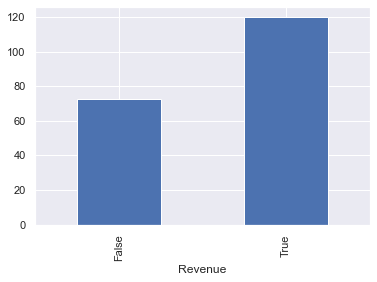

In [36]:
df.groupby('Revenue')['Administrative_Duration'].mean().plot.bar()

<AxesSubplot:xlabel='Month'>

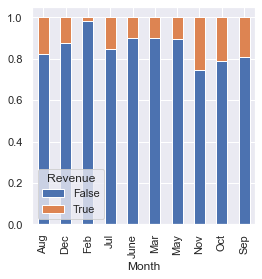

In [37]:
revenue=pd.crosstab(df['Month'],df['Revenue']) 
revenue.div(revenue.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [38]:
visitortype=pd.crosstab(df['VisitorType'],df['Revenue']) 
region=pd.crosstab(df['Region'],df['Revenue'])
browser=pd.crosstab(df['Browser'],df['Revenue'])
operatingsys=pd.crosstab(df['OperatingSystems'],df['Revenue'])

visitortype.div(visitortype.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
region.div(region.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()
browser.div(browser.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
operatingsys.div(operatingsys.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

KeyError: 'Region'

<AxesSubplot:xlabel='Month'>

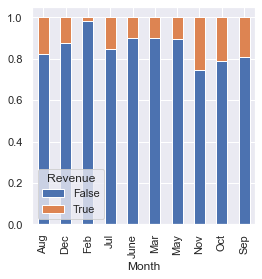

In [39]:
revenue=pd.crosstab(df['Month'],df['Revenue']) 
revenue.div(revenue.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [40]:
visitortype=pd.crosstab(df['VisitorType'],df['Revenue']) 
region=pd.crosstab(df['Region'],df['Revenue'])
browser=pd.crosstab(df['Browser'],df['Revenue'])
operatingsys=pd.crosstab(df['OperatingSystems'],df['Revenue'])

visitortype.div(visitortype.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
region.div(region.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()
browser.div(browser.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
operatingsys.div(operatingsys.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

KeyError: 'Region'

TypeError: The y variable is categorical, but one of ['numeric', 'datetime'] is required

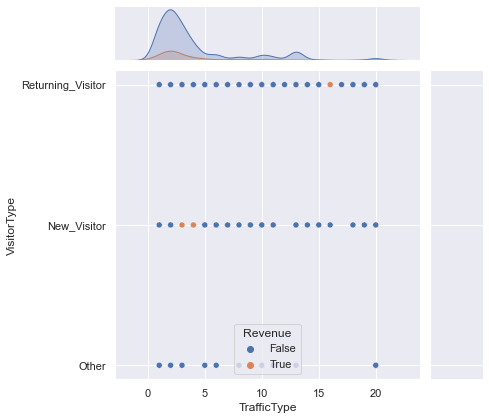

In [41]:
sns.jointplot(data=df, x="TrafficType", y="VisitorType", hue="Revenue")

In [ ]:
df.plot(x='PageValues', y='BounceRates', kind='kde')

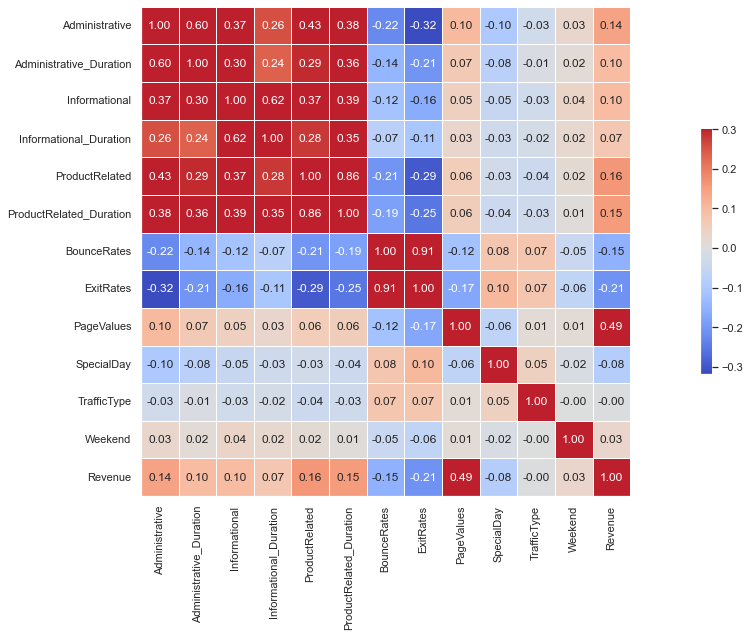

In [42]:
corr = df.corr()
g = sns.heatmap(corr, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(25,9)
plt.show()

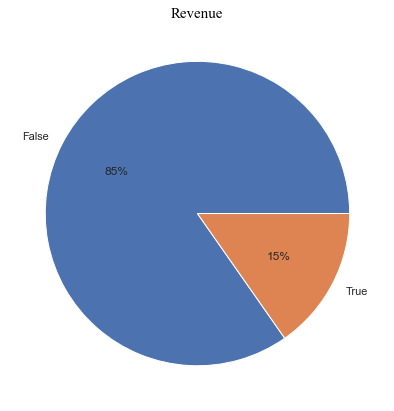

In [43]:
a = ((df['Revenue'] == False).sum() / df['Revenue'].count() * 100), ((df['Revenue'] == True).sum() / df['Revenue'].count() * 100)
font1 = {'family':'times new roman','color':'black','size':15}
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(a, labels = df['Revenue'].unique(),explode = [0, 0], autopct='%1.0f%%')
plt.title("Revenue", fontdict = font1)
plt.show()

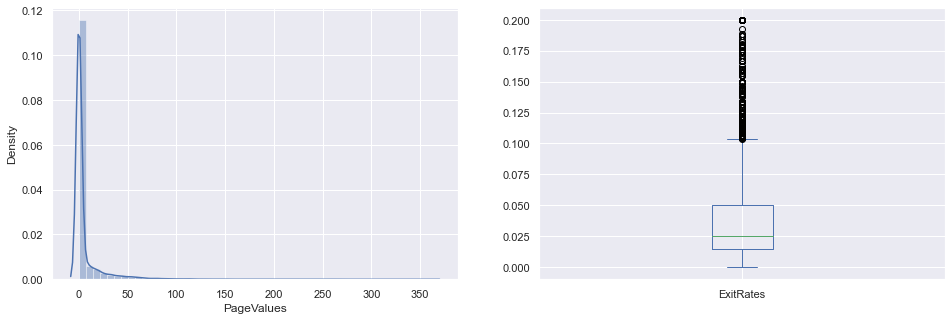

In [44]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df['PageValues']); 
plt.subplot(122)
df['ExitRates'].plot.box(figsize=(16,5)) 
plt.show()

Administrative process is completed


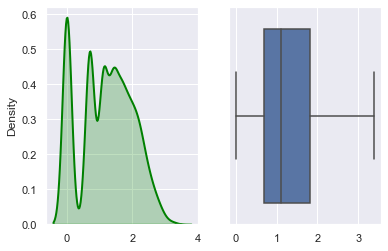

Administrative_Duration process is completed


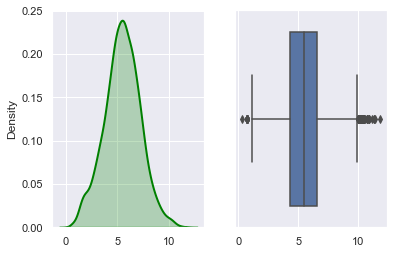

Informational process is completed


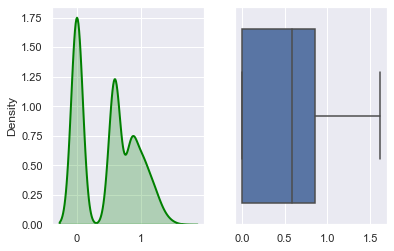

Informational_Duration process is completed


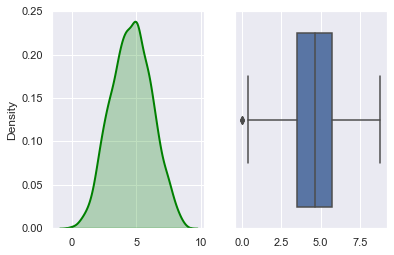

ProductRelated process is completed


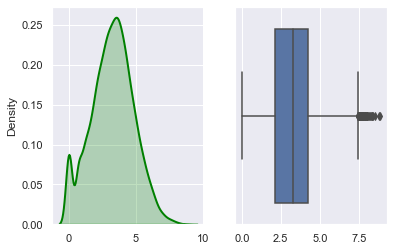

ProductRelated_Duration process is completed


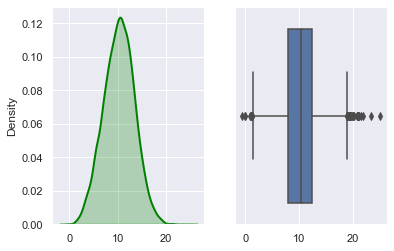

BounceRates process is completed


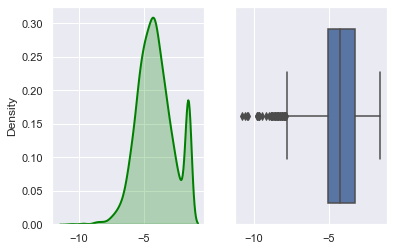

PageValues process is completed


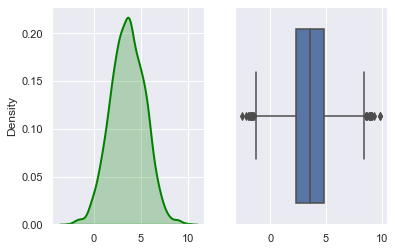

SpecialDay process is completed


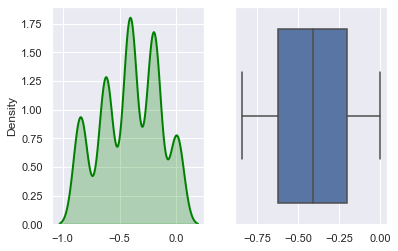

TrafficType process is completed


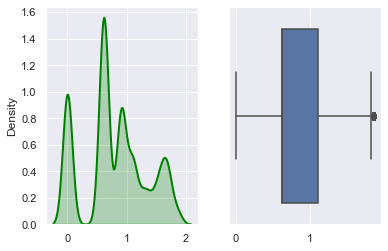

In [45]:
from scipy import stats

# transform training data & save lambda value
df_list = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 
           'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay', 'TrafficType']
for col in df_list:
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64':
        posdata = df[col][df[col] > 0]
        col_data, fitted_lambda = stats.boxcox(posdata)
        
  
        # creating axes to draw plots
        fig, ax = plt.subplots(1,2)


        sns.distplot(col_data, hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 2}, 
                     label = "Normal", color ="green", ax = ax[0])
        df.loc[df[col] > 0, col] = col_data
        print('{} process is completed'.format(col))

        plt.subplot(122)
        sns.boxplot(col_data)
        plt.show()

In [46]:
X = df.drop(['Revenue'], axis=1) # Features
y = df['Revenue'] # Label

X.shape, y.shape

((12546, 16), (12546,))

In [47]:
from sklearn.preprocessing import LabelEncoder
X_enc = X.copy()
y_enc = y.copy()
for col in X.columns:
    if X[col].dtypes == 'object' or X[col].dtypes == 'bool':
        lb = LabelEncoder()
        X_enc[col] = lb.fit_transform(X[col].values)
        y_enc = lb.fit_transform(df['Revenue'])
        

X_enc.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,0.00000,0.000000,-1.615850,0.20,0.0,0.0,2,1,1,0.000000,2,0
1,0.0,0.0,0.0,0.0,0.71463,5.546372,0.000000,0.10,0.0,0.0,2,0,2,0.615267,2,0
2,0.0,0.0,0.0,0.0,0.00000,0.000000,-1.615850,0.20,0.0,0.0,2,2,1,0.911580,2,0
3,0.0,0.0,0.0,0.0,0.71463,1.048781,-3.017997,0.14,0.0,0.0,2,3,2,1.097658,2,0
4,0.0,0.0,0.0,0.0,2.55132,10.168902,-3.950048,0.05,0.0,0.0,2,3,4,1.097658,2,1


In [48]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_enc,y_enc.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 1917
Before OverSampling, counts of label '0': 10629 

After OverSampling, the shape of train_X: (21258, 16)
After OverSampling, the shape of train_y: (21258,) 

After OverSampling, counts of label '1': 10629
After OverSampling, counts of label '0': 10629


In [49]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))

Before OverSampling, counts of label '1': 1917
Before OverSampling, counts of label '0': 10629 



In [50]:
Python 3

SyntaxError: invalid syntax (Temp/ipykernel_25964/4207192227.py, line 1)

In [51]:
nullcount = shoppers_data.isnull().sum()
print('Total number of null values in dataset:', nullcount.sum())

Total number of null values in dataset: 0


In [52]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_enc,y_enc.ravel())

In [53]:
conda install -c conda-forge imbalanced-learn

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done


## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2022.4.26-~ --> conda-forge::ca-certificates-2022.6.15-h5b45459_0
  conda              pkgs/main::conda-4.13.0-py39haa95532_0 --> conda-forge::conda-4.13.0-py39hcbf5309_1

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            pkgs/main::certifi-2022.6.15-py39haa9~ --> conda-forge::certifi-2022.6.15-py39hcbf5309_0
  openssl              pkgs/main::openssl-1.1.1p-h2bbff1b_0 --> conda-forge::openssl-1.1.1p-h8ffe710_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_enc,y_enc.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (21258, 16)
After OverSampling, the shape of train_y: (21258,) 

After OverSampling, counts of label '1': 10629
After OverSampling, counts of label '0': 10629


In [57]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size =0.3)

In [58]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
sv_train = svc.score(x_train, y_train)
sv_test = svc.score(x_test, y_test)

In [59]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=2000, random_state=0, learning_rate=0.02)
xgb.fit(x_train, y_train)
preds_valid = xgb.predict(x_test)
xgb_train =  xgb.score(x_train, y_train)
xgb_test = xgb.score(x_test, y_test)

[20:57:26] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
pip install xgboost-0.81-cp37-cp37m-win_amd64.whl

In [ ]:
conda install -c conda-forge xgboost

In [60]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=2000, random_state=0, learning_rate=0.02)
xgb.fit(x_train, y_train)
preds_valid = xgb.predict(x_test)
xgb_train =  xgb.score(x_train, y_train)
xgb_test = xgb.score(x_test, y_test)

[20:58:31] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [61]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(100)
clf.fit(x_train, y_train)
rf_train = clf.score(x_train, y_train)
rf_test = clf.score(x_test, y_test)

In [62]:
data = {'Algorithms':['SVC', 'XGBClassifier', 'RandomForestClassifier'], 
        'Train':[sv_train, xgb_train, rf_train],
       'Test':[sv_test, xgb_test, rf_test]}
 
# Calling DataFrame constructor
a = pd.DataFrame(data)
 
    
print(a)

               Algorithms     Train      Test
0                     SVC  0.847245  0.847915
1           XGBClassifier  0.993011  0.940263
2  RandomForestClassifier  1.000000  0.933678


In [63]:
gnb = GaussianNB() 
gnb.fit(x_train, y_train) 

# Make prediction using our test data and model
y_pred = gnb.predict(x_test) 

# Comparing our prediction to response values
print("Gaussian Naive Bayes model accuracy(in %):", round(metrics.accuracy_score(y_test, y_pred)*100,2))

Gaussian Naive Bayes model accuracy(in %): 78.35


In [64]:
rfc = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
rfc.fit(x_train, y_train)

# make prediction using our test data and model
y_pred_rfc = rfc.predict(x_test)
y_prob_rfc = rfc.predict_proba(x_test)[:, 1]

# Comparing our prediciton to response values
print('Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_rfc)*100,2))

Random Forest Classifier model accuracy(in %): 86.52


In [65]:
rfc = RandomForestClassifier(max_depth=6, random_state=2, n_estimators=550)
rfc.fit(x_train, y_train)

# make prediction using our test data and model
y_pred_rfc = rfc.predict(x_test)
y_prob_rfc = rfc.predict_proba(x_test)[:, 1]

# Comparing our prediciton to response values
print('Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_rfc)*100,2))

Random Forest Classifier model accuracy(in %): 87.24


In [66]:
rfc = RandomForestClassifier(max_depth=4, random_state=2, n_estimators=550)
rfc.fit(x_train, y_train)

# make prediction using our test data and model
y_pred_rfc = rfc.predict(x_test)
y_prob_rfc = rfc.predict_proba(x_test)[:, 1]

# Comparing our prediciton to response values
print('Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_rfc)*100,2))

Random Forest Classifier model accuracy(in %): 85.86


In [67]:
rfc = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=850)
rfc.fit(x_train, y_train)

# make prediction using our test data and model
y_pred_rfc = rfc.predict(x_test)
y_prob_rfc = rfc.predict_proba(x_test)[:, 1]

# Comparing our prediciton to response values
print('Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_rfc)*100,2))

Random Forest Classifier model accuracy(in %): 86.47


In [73]:
rfc = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=950)
rfc.fit(x_train, y_train)

# make prediction using our test data and model
y_pred_rfc = rfc.predict(x_test)
y_prob_rfc = rfc.predict_proba(x_test)[:, 1]

# Comparing our prediciton to response values
print('Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_rfc)*100,2))

Random Forest Classifier model accuracy(in %): 86.45


In [74]:
rfc = RandomForestClassifier(max_depth=3, random_state=2, n_estimators=600)
rfc.fit(x_train, y_train)

# make prediction using our test data and model
y_pred_rfc = rfc.predict(x_test)
y_prob_rfc = rfc.predict_proba(x_test)[:, 1]

# Comparing our prediciton to response values
print('Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_rfc)*100,2))

Random Forest Classifier model accuracy(in %): 85.75


In [75]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
sv_train = svc.score(x_train, y_train)
sv_test = svc.score(x_test, y_test)

In [71]:
# Fit Extra Trees Classifier to our Training Data
etc = ExtraTreesClassifier(random_state=2, n_estimators=950)
etc.fit(x_train, y_train)

# make prediction using our test data and model
y_pred_etc = etc.predict(x_test)
y_prob_etc = etc.predict_proba(x_test)[:, 1]

# Comparing our prediciton to response values
print('Extra Trees Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_etc)*100,2))

Extra Trees Classifier model accuracy(in %): 93.99


In [76]:
etc = ExtraTreesClassifier(random_state=3, n_estimators=550)
etc.fit(x_train, y_train)

# make prediction using our test data and model
y_pred_etc = etc.predict(x_test)
y_prob_etc = etc.predict_proba(x_test)[:, 1]

# Comparing our prediciton to response values
print('Extra Trees Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_etc)*100,2))

Extra Trees Classifier model accuracy(in %): 93.92


In [77]:
etc = ExtraTreesClassifier(random_state=3, n_estimators=750)
etc.fit(x_train, y_train)

# make prediction using our test data and model
y_pred_etc = etc.predict(x_test)
y_prob_etc = etc.predict_proba(x_test)[:, 1]

# Comparing our prediciton to response values
print('Extra Trees Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_etc)*100,2))

Extra Trees Classifier model accuracy(in %): 93.9


In [ ]:
# Calculate ROC AUC for our best performing classifier, the Random Forest Classifier
roc_value = roc_auc_score(y_test, y_prob_etc)
print('The area under the ROC curve is:', round(roc_value,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_rfc)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic ')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Calculate ROC AUC for our best performing classifier, the Random Forest Classifier
roc_value = roc_auc_score(y_test, y_prob_etc)
print('The area under the ROC curve is:', round(roc_value,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_etc)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.title('Extra Trees Classifier ROC-AUC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Calculate Log Loss
rfc_log_loss = log_loss(y_pred_etc, y_prob_etc, eps=1e-15)
print('Log Loss:', round(rfc_log_loss,2))

In [ ]:
X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(X, y,stratify=y, test_size=.2, random_state=2, shuffle=True)

In [ ]:
# Fit Gaussian Naive Bayes Classifier to our training data
gnb_stratified = GaussianNB() 



In [ ]:
# Fit Gaussian Naive Bayes Classifier to our training data
gnb_stratified = GaussianNB() 
gnb_stratified.fit(X_train_stratified, y_train_stratified) 

# Make prediction using our test data and model
y_pred_stratified = gnb_stratified.predict(X_test_stratified) 

# Comparing our prediction to response values
print("Stratified Gaussian Naive Bayes model accuracy(in %):", round(metrics.accuracy_score(y_test_stratified, y_pred_stratified)*100,2))

In [ ]:
visitor_encoded = pd.get_dummies(shopper_data_clean['VisitorType'], prefix='Visitor_Type', drop_first = True)

shopper_data_clean_merged = pd.concat([shopper_data_clean, visitor_encoded], axis=1).drop(['VisitorType'], axis=1)

In [ ]:
shopping = pd.read_csv('./online_shoppers_intention.csv')


In [ ]:
monthly = shopping['Month'].value_counts()

sns.countplot(shopping['Month'], order=monthly.index)
plt.title('Entries per Month', fontsize=15)
xval = -.42
plt.ylim(0,4000)

for index, value in monthly.items():
    plt.text(x=xval, y=value+50, s=str(value))
    xval += 1.02

In [ ]:
# Removing unneccessary columns from data: shopping_clean

shopping_clean = shopping.drop(['Month','Browser','OperatingSystems','TrafficType','Weekend'], axis=1)

In [ ]:
visitor_encoded = pd.get_dummies(shopping_clean['VisitorType'], prefix='Visitor_Type', drop_first = True)

shopping_clean_merged = pd.concat([shopping_clean, visitor_encoded], axis=1).drop(['VisitorType'], axis=1)

In [ ]:
X = shopping_clean_merged.drop('Revenue', axis=1)
y = shopping_clean_merged['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2, test_size=.2)

In [ ]:
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

# Make prediction using our test data and model
y_pred = gnb.predict(X_test) 

# Comparing our prediction to response values
print("Gaussian Naive Bayes model accuracy(in %):", round(metrics.accuracy_score(y_test, y_pred)*100,2))

In [ ]:
# Fit Random Forest Classifier to our Training Data
rfc = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
rfc.fit(X_train, y_train)

# make prediction using our test data and model
y_pred_rfc = rfc.predict(X_test)
y_prob_rfc = rfc.predict_proba(X_test)[:, 1]

# Comparing our prediciton to response values
print('Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_rfc)*100,2))

In [ ]:
# Fit Extra Trees Classifier to our Training Data
etc = ExtraTreesClassifier(random_state=2, n_estimators=1000)
etc.fit(X_train, y_train)

# make prediction using our test data and model
y_pred_etc = etc.predict(X_test)
y_prob_etc = etc.predict_proba(X_test)[:, 1]

# Comparing our prediciton to response values
print('Extra Trees Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_etc)*100,2))

In [ ]:
# Calculate ROC AUC for our best performing classifier, the Random Forest Classifier
roc_value = roc_auc_score(y_test, y_prob_rfc)
print('The area under the ROC curve is:', round(roc_value,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_rfc)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Calculate Log Loss
rfc_log_loss = log_loss(y_pred_rfc, y_prob_rfc, eps=1e-15)
print('Log Loss:', round(rfc_log_loss,2))

In [ ]:
conda install xgboost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=2000, random_state=0, learning_rate=0.02)
xgb.fit(X_train, y_train)
preds_valid = xgb.predict(X_test)
xgb_train =  xgb.score(X_train, y_train)
xgb_test = xgb.score(X_test, y_test)

In [ ]:
shopping_clean = shopping.drop(['Month','Browser','OperatingSystems','Region','TrafficType','Weekend'], axis=1)

In [ ]:
# Fit Extra Trees Classifier to our Training Data
etc = ExtraTreesClassifier(random_state=2, n_estimators=1000)
etc.fit(X_train, y_train)

# make prediction using our test data and model
y_pred_etc = etc.predict(X_test)
y_prob_etc = etc.predict_proba(X_test)[:, 1]

# Comparing our prediciton to response values
print('Extra Trees Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_etc)*100,2))

In [ ]:
# Calculate ROC AUC for our best performing classifier, the Random Forest Classifier
roc_value = roc_auc_score(y_test, y_prob_rfc)
print('The area under the ROC curve is:', round(roc_value,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_rfc)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Calculate ROC AUC for our best performing classifier, the 
roc_value = roc_auc_score(y_test, y_prob_etc)
print('Extra Trees Classifier ROC-AUC:', round(roc_value,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_etc)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.title('Extra Trees Classifier ROC-AUC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(X, y,stratify=y, test_size=.2, random_state=2, shuffle=True)

In [ ]:
# Fit Gaussian Naive Bayes Classifier to our training data
gnb_stratified = GaussianNB() 
gnb_stratified.fit(X_train_stratified, y_train_stratified) 

# Make prediction using our test data and model
y_pred_stratified = gnb_stratified.predict(X_test_stratified) 

# Comparing our prediction to response values
print("Stratified Gaussian Naive Bayes model accuracy(in %):", round(metrics.accuracy_score(y_test_stratified, y_pred_stratified)*100,2))

In [ ]:
rfc_stratified = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
rfc_stratified.fit(X_train_stratified, y_train_stratified)

# make prediction using our test data and model
y_pred_rfc_stratified = rfc_stratified.predict(X_test_stratified)
y_prob_rfc_stratified = rfc_stratified.predict_proba(X_test_stratified)[:, 1]

# Comparing our prediciton to response values
print('Stratified Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test_stratified, y_pred_rfc_stratified)*100,2))

In [ ]:
etc_stratified = ExtraTreesClassifier(random_state=2, n_estimators=1000)
etc_stratified.fit(X_train_stratified, y_train_stratified)

# make prediction using our test data and model
y_pred_etc_stratified = etc_stratified.predict(X_test_stratified)
y_prob_etc_stratified = etc_stratified.predict_proba(X_test_stratified)[:, 1]

# Comparing our prediciton to response values
print('Extra trees Classifier(in %):', round(metrics.accuracy_score(y_test_stratified, y_pred_etc_stratified)*100,2))

In [ ]:
simple_model = shopping_clean_merged.drop(['Informational_Duration','Weekend','Month','Browser','OperatingSystems','TrafficType'], axis=1)

# Split train and test data

X_simp = simple_model.drop('Revenue', axis=1)
y_simp = simple_model['Revenue']
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=2)

In [ ]:
# Let us plot the ROC curve for the Random Forest Classifier for both the stratified data versus the unbalanced data.

roc_value = roc_auc_score(y_test, y_prob_etc)
print('The area under the ROC curve for unbalanced data is:', round(roc_value,2))

roc_value_stratified = roc_auc_score(y_test_stratified, y_prob_etc_stratified)
print('The area under the ROC curve for stratified data is:', round(roc_value_stratified,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_etc)
roc_auc = metrics.auc(fpr, tpr)

fpr_strat, tpr_strat, threshold_strat = metrics.roc_curve(y_test_stratified, y_prob_etc_stratified)
roc_auc_strat = metrics.auc(fpr_strat, tpr_strat)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic, Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'Unbalanced AUC = %0.2f' % roc_auc)
plt.plot(fpr_strat, tpr_strat, 'r', label = 'Stratified AUC = %0.2f' % roc_auc_strat)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
importances = etc_stratified.feature_importances_
std = np.std([tree.feature_importances_ for tree in etc_stratified.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_train_stratified.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

In [ ]:
col_names = pd.Series([col for col in X_train_stratified.columns])

importance_df = pd.DataFrame(importances)
importance_df.rename(columns={0:'Importance'}, inplace=True)
importance_df.set_index(col_names,inplace=True)

imp_sorted = importance_df.sort_values(by='Importance', ascending=False)
imp_sorted

In [ ]:
plt.title("Importance of each feature in the model")
plt.bar(range(X_train_stratified.shape[1]),importances[indices])
plt.xticks(range(X_train_stratified.shape[1]), imp_sorted.index, rotation=80)
plt.xlim([-1, X_train_stratified.shape[1]])
plt.show()

In [ ]:
simple_model = shopping_clean_merged.drop(['Administrative_Duration','Administrative','Visitor_Type_Returning_Visitor','Informational_Duration','Informational','SpecialDay','Visitor_Type_Other'], axis=1)

# Split train and test data

X_simp = simple_model.drop('Revenue', axis=1)
y_simp = simple_model['Revenue']
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=2)

In [ ]:
plt.title("Importance of each feature in the model")
plt.bar(range(X_train_stratified.shape[1]),importances[indices])
plt.xticks(range(X_train_stratified.shape[1]), imp_sorted.index, rotation=80)
plt.xlim([-1, X_train_stratified.shape[1]])
plt.show()

In [ ]:
clf = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)

scores = cross_val_score(clf, X_simp, y_simp, cv=cv)
print("Average Accuracy of Classifier over 10-folds: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
def model_graph(name,algo, Xtrain,ytrain,Xtest,ytest):   
    
    algo.fit(Xtrain,ytrain)
    ytrain_pred =algo.predict(Xtrain)
    ytrain_prob = algo.predict_proba(Xtrain)[:,1]

    acc_train_sm.append(accuracy_score(ytrain, ytrain_pred))
    auc_train_sm.append(roc_auc_score(ytrain, ytrain_prob))

    ytest_pred = algo.predict(Xtest)
    ytest_prob = algo.predict_proba(Xtest)[:,1]

    acc_test_sm.append(accuracy_score(ytest, ytest_pred))
    auc_test_sm.append(roc_auc_score(ytest, ytest_prob))


    fpr,tpr,th=roc_curve(ytest, ytest_prob)
    
    plt.plot(fpr,tpr,label=name)
    plt.plot(fpr,fpr)
    plt.legend(loc="lower right")

plt.show()

In [ ]:
plt.figure(figsize=(10,7))
model_sm_final=[('Random Forest Tuned',rfc_stratified ),('Extra Trees',etc_stratified ),
                ('Naive',gnb_stratified)]
for name,algo in model_sm_final:
    model_graph(name,algo,X_train_stratified,y_train_stratified,X_test,y_test)

In [ ]:
X_train_simp, X_test_simp, y_train_simp, y_test_simp = train_test_split(X_simp, y_simp,stratify=y_simp, test_size=.2, shuffle=True, random_state=1)
clf_simp = RandomForestClassifier(max_depth=5, n_estimators=1000)

clf_simp.fit(X_train_simp,y_train_simp)
y_pred_simp = clf_simp.predict(X_test_simp)
y_prob_simp = clf_simp.predict_proba(X_test_simp)[:, 1]

fpr_simp, tpr_simp, threshold_strat = metrics.roc_curve(y_test_simp, y_prob_simp)
roc_auc_simp = metrics.auc(fpr_simp, tpr_simp)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic, Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_strat, tpr_strat, 'r', label = 'Stratified AUC = %0.2f' % roc_auc_strat)
plt.plot(fpr_simp, tpr_simp, 'g', label = 'Simple Model AUC = %0.2f' % roc_auc_simp)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
clf2 = ExtraTreesClassifier(random_state=2, n_estimators=750)

scores = cross_val_score(clf2, X_simp, y_simp, cv=cv)
print("Average Accuracy of Classifier over 10-folds: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
X_train_simp, X_test_simp, y_train_simp, y_test_simp = train_test_split(X_simp, y_simp,stratify=y_simp, test_size=.2, shuffle=True, random_state=1)
clf_simp = ExtraTreesClassifier(random_state=2, n_estimators=1000)

clf_simp.fit(X_train_simp,y_train_simp)
y_pred_simp = clf_simp.predict(X_test_simp)
y_prob_simp = clf_simp.predict_proba(X_test_simp)[:, 1]

fpr_simp, tpr_simp, threshold_strat = metrics.roc_curve(y_test_simp, y_prob_simp)
roc_auc_simp = metrics.auc(fpr_simp, tpr_simp)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic, Extra Trees Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_strat, tpr_strat, 'r', label = 'Stratified AUC = %0.2f' % roc_auc_strat)
plt.plot(fpr_simp, tpr_simp, 'g', label = 'Simple Model AUC = %0.2f' % roc_auc_simp)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
conda install sklearn.externals.six

In [ ]:
# Dummy Classifier

dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train,y_train)

y_pred_dummy = dummy_clf.predict(X_test)
y_prob_dummy = dummy_clf.predict_proba(X_test)[:, 1]

fpr_dummy, tpr_dummy, threshold_strat = metrics.roc_curve(y_test, y_prob_dummy)
roc_auc_dummy = metrics.auc(fpr_dummy, tpr_dummy)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic, Extra Trees Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_strat, tpr_strat, 'r', label = 'Stratified AUC = %0.2f' % roc_auc_strat)
plt.plot(fpr_simp, tpr_simp, 'g', label = 'Simple Model AUC = %0.2f' % roc_auc_simp)
plt.plot(fpr_dummy, tpr_dummy, 'k', label = 'Dummy Model AUC = %0.2f' % roc_auc_dummy)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#Comparing accuracy of each Algorithm
Algorithms1 = ["Logistic Regression"," K-NN Algorithm ","SVM ","Decision Tree","Random Forest","Gaussian NB"]
Accuracy_Score1=[logistic_accuracy_m,KNN_accuracy_m,SVM_accuracy_rbf_m,DT_accuracy_m,RNDFrst_accuracy_m,GaussNB_accuracy_m]

#Checking Accuracies of various Algorithms
Algorithms_Accuracy1= pd.DataFrame({" Algorithms":Algorithms1,"Accuracy Score":Accuracy_Score1})
Algorithms_Accuracy1

Algorithms_Accuracy1['Accuracy Score'].mean()